# **Module 6: Descriptive and Predictive Modeling**
## **Exercise 1:** K-Nearest Neighbors in depth
### **Submitted by:** Vitor Oliveira de Souza (Z0963220P), Jorge De La Torre (DNI), Phoebe (DNI), Miguel Galán (DNI)
### **Date:** 13/02/2024

#### **A)** "from sklearn.datasets import load_breast_cancer" (basic)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
# Load dataset from sklearn datasets
dataset = load_breast_cancer()

In [3]:
# Get input data from dataset
X = pd.DataFrame(dataset.data)
# Get feature names
X.columns = dataset.feature_names
# Get output labels
y = pd.DataFrame(dataset.target)
y.columns = ['target']

#### 1) Describe the dataset in dimensions such as number of features, number of categories, and number of samples per category using Python.

In [4]:
# Take a look in input data
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Analyse input and output data shapes
X.shape, y.shape

((569, 30), (569, 1))

In [6]:
# Get labels names
target_names = dataset.target_names
print('Categories names: ',target_names)

Categories names:  ['malignant' 'benign']


In [7]:
# Analyse how many examples there are for each category
group_by_category = y.groupby('target').size()
print('There are {} samples of {} category and {} samples of {} category'.format(group_by_category[0],target_names[0],group_by_category[1],target_names[1]))

There are 212 samples of malignant category and 357 samples of benign category


In [8]:
# Analyse input data distribution
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


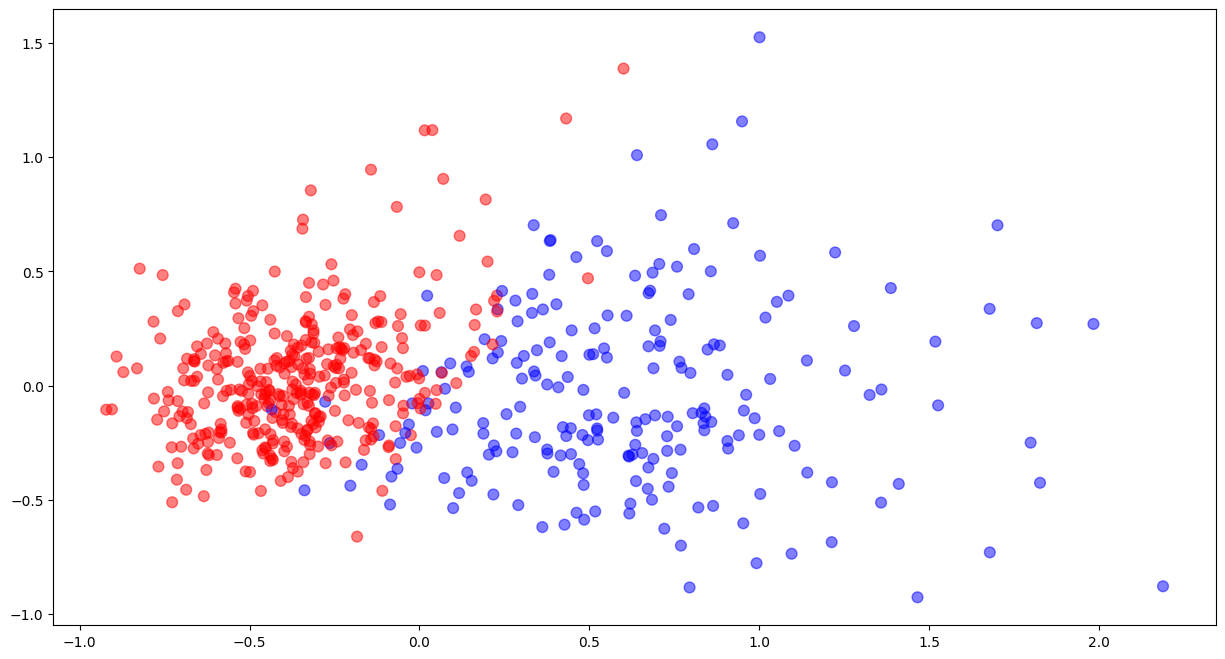

In [15]:
# Visualise the data in 2D using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca['target'] = y 
X_pca['label'] = ['malignant' if target == 0 else 'benign' for target in X_pca['target']]

# Plot the data
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=X_pca['PC1'],
           y=X_pca['PC2'],
           c=X_pca['target'],
           cmap='bwr',
           s=60,alpha=0.5)

In [16]:
# Now visualize the data in 3d
%matplotlib qt

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3'])
X_pca['target'] = y 
X_pca['label'] = ['malignant' if target == 0 else 'benign' for target in X_pca['target']]

# Plot the data
fig, ax = plt.subplots(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca['PC1'],
           X_pca['PC2'],
           X_pca['PC3'],
           c=X_pca['target'],
           cmap='bwr',
           s=60,alpha=0.5)

#### Answer 1:
##### **Number of features**: According to input shape, there are 30 features in total
##### **Number of categories**: According to target_names and also from unique values in output data, there are two categories: Malignant and Benign
##### **Number of samples in each category**: There are 212 samples of malignant category and 357 samples of benign
##### **Inbalanced data**: The classes seems to be inbalanced with more samples with benign label
##### **Presence of outliers**: It's possible to check visually that the classes are mixed in some areas. At least in 2d and 3d projections, there are points of the first class inside the second class area of points.
# ------------------------------------------------------------------------------------------

#### 2) Represent the statistical support of every feature graphically, resorting to Matplotlib’s boxplot function. Are there any outliers that can be detected by simple visual inspection? If so, devise a handcrafted method to detect and isolate such examples.

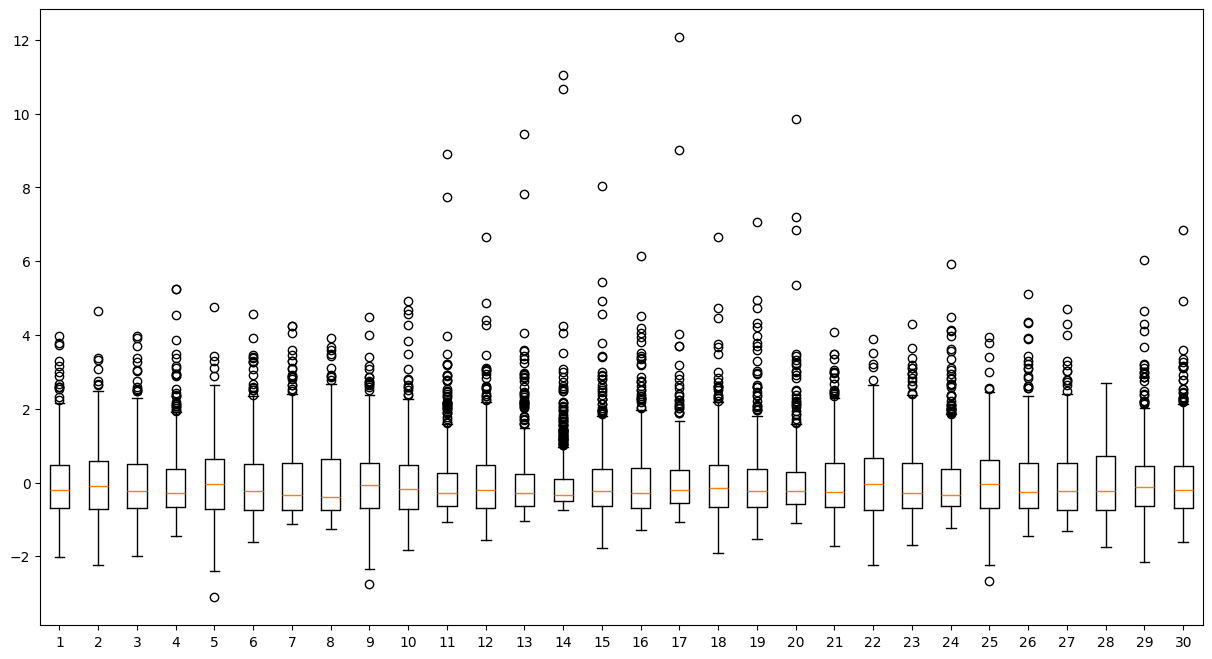

In [17]:
# Let's check all the boxplots together
%matplotlib inline
scaler = StandardScaler()
X_standard_scaled = pd.DataFrame(scaler.fit_transform(X))
fig, ax = plt.subplots(figsize=(15, 8))
ax.boxplot(X_standard_scaled);

There was found a total of 11 outliers out of 212 in the category: 0
There was found a total of 17 outliers out of 357 in the category: 1


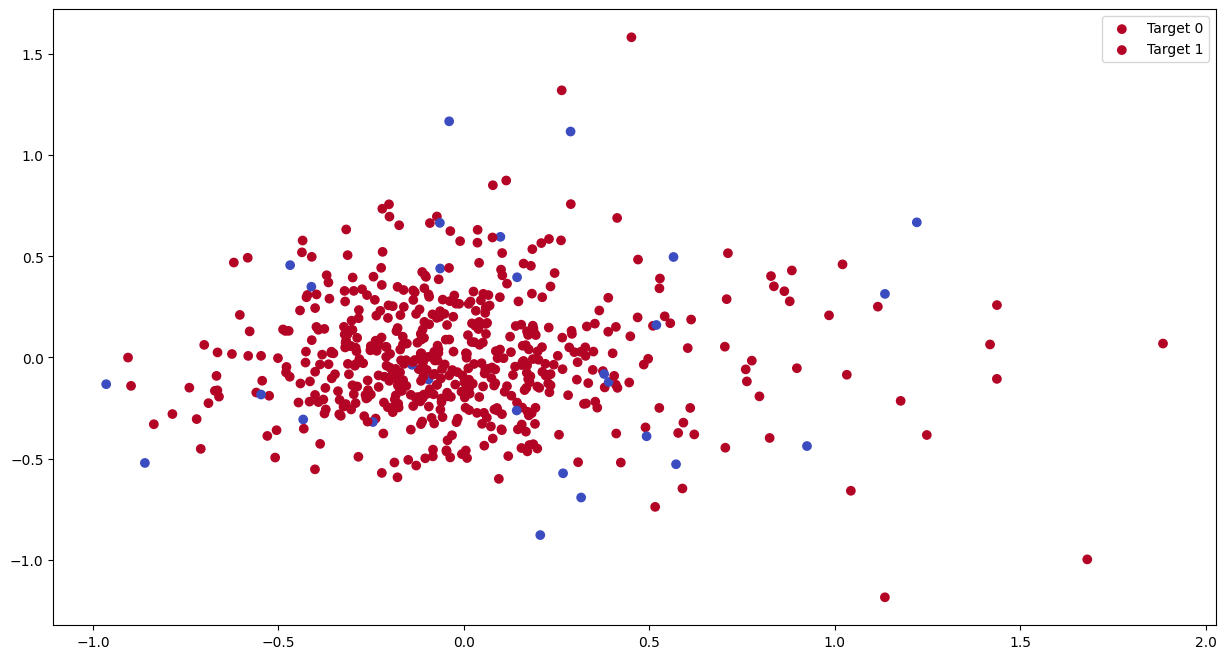

In [28]:
from sklearn.svm import OneClassSVM
%matplotlib inline

def clean_outliers(data,target_column,targets):
    # for plotting the data
    fig, ax = plt.subplots(figsize=(15, 8))
    features = data.drop(columns=[target_column])
    #scaler = StandardScaler().fit(features)
    #scaled_features = scaler.transform(features)
    for target in targets:
        # Filter based on the original data, not the scaled data
        filter_condition = data[target_column] == target
        if np.sum(filter_condition) == 0:
            print(f"No samples found for target = {target}")
            continue
        X = features[filter_condition]
        
        outliers_detector = OneClassSVM(nu=0.01).fit(X)
        X_outliers = outliers_detector.predict(X)
        n_outliers = np.sum(X_outliers == -1)
        total_samples = len(X)
        print(f'There was found a total of {n_outliers} outliers out of {total_samples} in the category: {target}')

        # Plot data
        pca = PCA(n_components=3)
        X_pca = pca.fit_transform(X)
        ax.scatter(x=X_pca[:,0], y=X_pca[:,1], c=X_outliers, cmap='coolwarm', label=f'Target {target}')
    
    ax.legend()
    plt.show()

df = X_scaled
X_scaled['target'] = y
clean_outliers(df,'target',[0,1])

In [29]:
# repeat in 3d
%matplotlib qt

def clean_outliers_3d(data,target_column,targets):
    # for plotting the data
    fig, ax = plt.subplots(figsize=(15, 8))
    features = data.drop(columns=[target_column])
    scaler = StandardScaler().fit(features)
    scaled_features = scaler.transform(features)
    for target in targets:
        # Filter based on the original data, not the scaled data
        filter_condition = data[target_column] == target
        if np.sum(filter_condition) == 0:
            print(f"No samples found for target = {target}")
            continue
        X = scaled_features[filter_condition]
        
        #outliers_detector = IsolationForest(random_state=0).fit(X)
        outliers_detector = OneClassSVM(nu=0.01).fit(X)
        X_outliers = outliers_detector.predict(X)
        n_outliers = np.sum(X_outliers == -1)
        total_samples = len(X)
        print(f'There was found a total of {n_outliers} outliers out of {total_samples} in the category: {target}')

        # Plot data
        pca = PCA(n_components=3)
        X_pca = pca.fit_transform(X)
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=X_outliers, cmap='coolwarm', label=f'Target {target}')
    
    ax.legend()
    plt.show()

clean_outliers_3d(df,'target',[1])

There was found a total of 28 outliers out of 357 in the category: 1


#### Answer 2:
##### In the boxplot graphs it is possible to see that the data is highly distribuited. Almost all feature has points outside the whiskers
##### In our opinion the points outside the whiskers don't represent outliers in this case. It seems that there are subgroups inside the data with different distribuitions 
##### This can be valuable to our analysis and in fact can help us to classify our dataset
##### Although there's some high variance in the data, there're points that seems to be even more far away from the rest of the data in some features

### CLean Outliers
##### To clean the outliers we performerd....
# ------------------------------------------------------------------------------------------

#### 3) Repeat each of the experiments seen in class with the K-Nearest Neighbors model, providing arguments for each of the steps taken along the process, and commenting on the partial results obtained with the selected dataset. Please use as many performance metrics as needed to illustrate the particularities of the selected dataset (e.g. imbalanced classes).



In [93]:
# First we separate the input and output again (after outlier cleaning)
df_cleaned.reset_index(drop=True, inplace=True)
X_cleaned = df_cleaned.drop(columns=['target'])
y_cleaned = df_cleaned['target']

In [94]:
from sklearn.model_selection import StratifiedShuffleSplit

# Now we create a splitter to split the data considering the classes
# If we simply split the data randomly, the unbalanced classes could be splitted unevenly in train and test
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X_cleaned, y_cleaned):
    Xtrain, ytrain = X_cleaned.iloc[train_index], y_cleaned.iloc[train_index]
    Xtest, ytest = X_cleaned.iloc[test_index], y_cleaned.iloc[test_index]

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

estimator = Pipeline([('Scaler',MinMaxScaler()),('KNN',KNeighborsClassifier())])

param_grid = {'KNN__n_neighbors':[3,5,7,9,11,13,15]}
'''param_grid = {
    'weights': ['uniform','distance'],
    'metric': ['cityblock','minkowski'],
    'p': [2,3,4,5,6,7],
    'n_neighbors': [3,5,7,9,11,13,15]
}'''

gscv = GridSearchCV(
    estimator,
    param_grid,
    scoring="accuracy",
    cv=10,
    verbose=2,
    n_jobs=-1
)

start_time = datetime.now()
gscv.fit(Xtrain,ytrain)
total_time = datetime.now() - start_time

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [96]:
gscv.best_estimator_

Pipeline(steps=[('Scaler', MinMaxScaler()), ('KNN', KNeighborsClassifier())])

Total Time: 	0:00:07.185759
Accuracy: 	0.9730
F1 score: 	0.9790
AUC: 		0.9634

Confusion matrix values: 
 [[38  3]
 [ 0 70]]


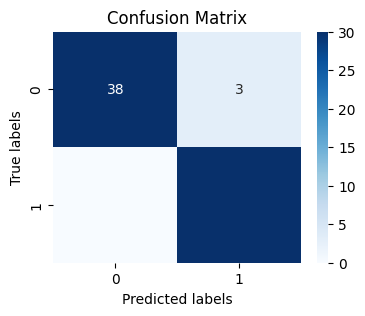

In [19]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns

# Elapsed time
print(f'Total Time: \t{total_time}')
# Gest best model from grid search cross validation and fit to the data
best_estimator = gscv.best_estimator_
best_estimator.fit(Xtrain,ytrain)
# Predict classes in test dataset
ypred = best_estimator.predict(Xtest)
# Calculate and print accuracy metric
print(f'Accuracy: \t{accuracy_score(ytest, ypred):.4f}')
# f1 score - Good metric to evaluate unbalanced data
print(f'F1 score: \t{f1_score(ytest, ypred):.4f}')
# ROC AUC
print(f'AUC: \t\t{roc_auc_score(ytest, ypred):.4f}')
# Confusion matrix
conf_matrix = confusion_matrix(ytest,ypred)
print('\nConfusion matrix values: \n', conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, vmax=30, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Answer 3:
##### As showed by the results, accuracy and F1 scores have values around 0.97 which can be seen as good in Test dataset
##### We check F1 score to evaluate the model in inbalanced data, as accuracy can be biased on most common class predicions
##### We also checked the ROC AUC and the confision matrix and all metrics seen to be good for a prediction model
# ------------------------------------------------------------------------------------------

#### 4) Read the Scikit-learn library documentation and configure the automated validation script so that the GridSearchCV() function uses leave-one-out cross-validation instead of k-fold. Which conclusions can be drawn from the mean cross-validation scores and the test scores using a k-neighbor model with optimized k?

In [20]:
from sklearn.model_selection import LeaveOneOut

gscv_loo = GridSearchCV(
    estimator,
    param_grid,
    scoring='accuracy',
    cv=LeaveOneOut(),
    verbose=2,
    n_jobs=-1,
    return_train_score = True
)

start_time = datetime.now()
gscv_loo.fit(Xtrain,ytrain)
total_time = datetime.now() - start_time

Fitting 442 folds for each of 7 candidates, totalling 3094 fits


In [21]:
results = pd.DataFrame(gscv_loo.cv_results_)
results['mean_test_score']
#results.head(10)

0    0.968326
1    0.970588
2    0.970588
3    0.970588
4    0.970588
5    0.968326
6    0.963801
Name: mean_test_score, dtype: float64

Total Time: 	0:00:39.173201
Accuracy: 	0.9730
F1 score: 	0.9790
AUC: 		0.9634

Confusion matrix values: 
 [[38  3]
 [ 0 70]]


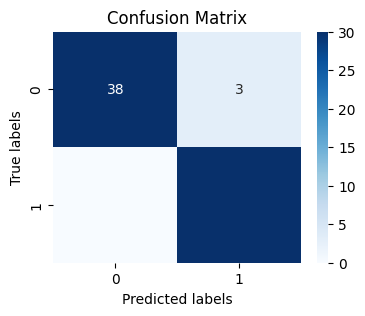

In [22]:
# Elapsed time
print(f'Total Time: \t{total_time}')
# Gest best model from grid search cross validation
best_estimator_loo = gscv_loo.best_estimator_
best_estimator_loo.fit(Xtrain,ytrain)
# Predict classes in test dataset
ypred = best_estimator_loo.predict(Xtest)
# Calculate and print accuracy metric
print(f'Accuracy: \t{accuracy_score(ytest, ypred):.4f}')
# f1 score - Good metric to evaluate unbalanced data
print(f'F1 score: \t{f1_score(ytest, ypred):.4f}')
# ROC AUC
print(f'AUC: \t\t{roc_auc_score(ytest, ypred):.4f}')
# Confusion matrix
conf_matrix = confusion_matrix(ytest,ypred)
print('\nConfusion matrix values: \n', conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, vmax=30, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Answer 4:
##### answer
# ------------------------------------------------------------------------------------------

#### 5) Elaborate on the need for stratifying the cross-validation process analyzing the distribution of samples by class. If so, please show with empirical evidence what could occur if such a stratification was not performed, specially when decreasing the number of samples of the dataset.

In [23]:
from sklearn.model_selection import StratifiedKFold

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_strat = GridSearchCV(
    estimator,
    param_grid,
    scoring="accuracy",
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

start_time = datetime.now()
gscv_strat.fit(Xtrain,ytrain)
total_time = datetime.now() - start_time

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Total Time: 	0:00:00.333341
Accuracy: 	0.9730
F1 score: 	0.9787
AUC: 		0.9685

Confusion matrix values: 
 [[39  2]
 [ 1 69]]


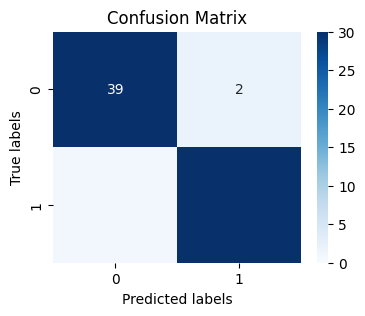

In [24]:
# Elapsed time
print(f'Total Time: \t{total_time}')
# Gest best model from grid search cross validation
best_estimator_loo = gscv_strat.best_estimator_
# We used multi-metric cross validation and refit the best model using f1 score
# Because of this the best model is already fitted to the entire train dataset and we don't need to do it again
# Predict classes in test dataset
ypred = best_estimator_loo.predict(Xtest)
# Calculate and print accuracy metric
print(f'Accuracy: \t{accuracy_score(ytest, ypred):.4f}')
# f1 score - Good metric to evaluate unbalanced data
print(f'F1 score: \t{f1_score(ytest, ypred):.4f}')
# ROC AUC
print(f'AUC: \t\t{roc_auc_score(ytest, ypred):.4f}')
# Confusion matrix
conf_matrix = confusion_matrix(ytest,ypred)
print('\nConfusion matrix values: \n', conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, vmax=30, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Answer 5:
##### In inbalanced datasets like this it's important to take the stratification into account during the cross validation process.
##### Cross validation is a process that randomly select a portion of the data to perform training and the rest leaves to evaluate the model.
##### In inbalanced data, when selecting the inbalanced dataset it's likely to select a training dataset without examples of all classes.
##### In binary classification like this, it's possible to select only one class for validation dataset and end up evaluating our model only in one class.
##### This validation dataset don't correspond to the real world data and the best model selected during cross validation will not perform well in production.
# ------------------------------------------------------------------------------------------

#### 6) Include in the set of hyper-parameters adjusted via cross-validation process the weights of the distance metric between samples according to the “weights” parameter of the model in Scikit-learn. Compute the model’s performance when distance metric weights are fine-tuned within cross-validation with respect to only tuning the number of neighbors (K).

In [25]:
param_grid = {'KNN__weights':['uniform','distance'],
               'KNN__n_neighbors':[3,5,7,9,11,13,15]}

param_grid_k = {'KNN__n_neighbors':[3,5,7,9,11,13,15]}

In [26]:
# Only tunning the model on n_neighbors

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_strat = GridSearchCV(
    estimator,
    param_grid_k,
    scoring="accuracy",
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

start_time = datetime.now()
gscv_strat.fit(Xtrain,ytrain)
total_time = datetime.now() - start_time

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Total Time: 	0:00:00.261247
Accuracy: 	0.9730
F1 score: 	0.9787
AUC: 		0.9685

Confusion matrix values: 
 [[39  2]
 [ 1 69]]


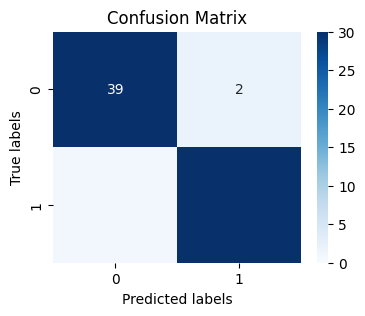

In [27]:
# Elapsed time
print(f'Total Time: \t{total_time}')
# Gest best model from grid search cross validation
best_estimator_strat = gscv_strat.best_estimator_
# We used multi-metric cross validation and refit the best model using f1 score
# Because of this the best model is already fitted to the entire train dataset and we don't need to do it again
# Predict classes in test dataset
ypred = best_estimator_strat.predict(Xtest)
# Calculate and print accuracy metric
print(f'Accuracy: \t{accuracy_score(ytest, ypred):.4f}')
# f1 score - Good metric to evaluate unbalanced data
print(f'F1 score: \t{f1_score(ytest, ypred):.4f}')
# ROC AUC
print(f'AUC: \t\t{roc_auc_score(ytest, ypred):.4f}')
# Confusion matrix
conf_matrix = confusion_matrix(ytest,ypred)
print('\nConfusion matrix values: \n', conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, vmax=30, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Tunning the model in all parameters

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_strat = GridSearchCV(
    estimator,
    param_grid,
    scoring="accuracy",
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

start_time = datetime.now()
gscv_strat.fit(Xtrain,ytrain)
total_time = datetime.now() - start_time

Fitting 10 folds for each of 14 candidates, totalling 140 fits


Total Time: 	0:00:00.469567
Accuracy: 	0.9730
F1 score: 	0.9787
AUC: 		0.9685

Confusion matrix values: 
 [[39  2]
 [ 1 69]]


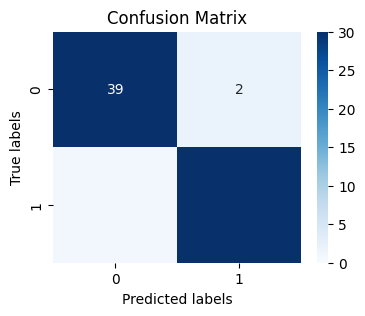

In [29]:
# Elapsed time
print(f'Total Time: \t{total_time}')
# Gest best model from grid search cross validation
best_estimator_loo = gscv_strat.best_estimator_
# We used multi-metric cross validation and refit the best model using f1 score
# Because of this the best model is already fitted to the entire train dataset and we don't need to do it again
# Predict classes in test dataset
ypred = best_estimator_loo.predict(Xtest)
# Calculate and print accuracy metric
print(f'Accuracy: \t{accuracy_score(ytest, ypred):.4f}')
# f1 score - Good metric to evaluate unbalanced data
print(f'F1 score: \t{f1_score(ytest, ypred):.4f}')
# ROC AUC
print(f'AUC: \t\t{roc_auc_score(ytest, ypred):.4f}')
# Confusion matrix
conf_matrix = confusion_matrix(ytest,ypred)
print('\nConfusion matrix values: \n', conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, vmax=30, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Answer 6:
##### answer
# ------------------------------------------------------------------------------------------

#### 7) Following the same approach as in the last section, enter the type of distance metric (“metric” parameter) within the cross-validation process. Evaluates the results and gains / losses of generalizability of the model.

In [30]:
param_grid = {'KNN__weights':['uniform','distance'],
               'KNN__metric':['cityblock','minkowski'],
               'KNN__p':[2,3,4,5,6,7],
               'KNN__n_neighbors':[3,5,7,9,11,13,15]}

In [31]:
# Tunning the model in all parameters

cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gscv_strat = GridSearchCV(
    estimator,
    param_grid,
    scoring="accuracy",
    cv=cv_stratified,
    verbose=2,
    n_jobs=-1
)

start_time = datetime.now()
gscv_strat.fit(Xtrain,ytrain)
total_time = datetime.now() - start_time

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


Total Time: 	0:00:09.800239
Accuracy: 	0.9820
F1 score: 	0.9859
AUC: 		0.9756

Confusion matrix values: 
 [[39  2]
 [ 0 70]]


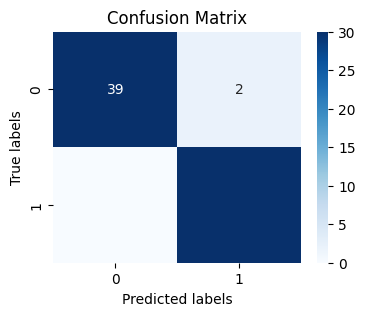

In [32]:
# Elapsed time
print(f'Total Time: \t{total_time}')
# Gest best model from grid search cross validation
best_estimator_loo = gscv_strat.best_estimator_
# We used multi-metric cross validation and refit the best model using f1 score
# Because of this the best model is already fitted to the entire train dataset and we don't need to do it again
# Predict classes in test dataset
ypred = best_estimator_loo.predict(Xtest)
# Calculate and print accuracy metric
print(f'Accuracy: \t{accuracy_score(ytest, ypred):.4f}')
# f1 score - Good metric to evaluate unbalanced data
print(f'F1 score: \t{f1_score(ytest, ypred):.4f}')
# ROC AUC
print(f'AUC: \t\t{roc_auc_score(ytest, ypred):.4f}')
# Confusion matrix
conf_matrix = confusion_matrix(ytest,ypred)
print('\nConfusion matrix values: \n', conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, vmax=30, vmin=0, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Answer 7:
##### answer
# ------------------------------------------------------------------------------------------

# Phoebe's additions

## Before fitting, check for outliers

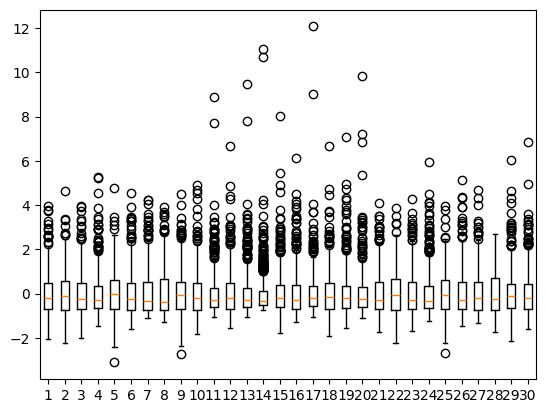

In [33]:
# Let's use standard scaler to normalize the data and then plot the boxplots again
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
plt.boxplot(X_scaled)
plt.show()

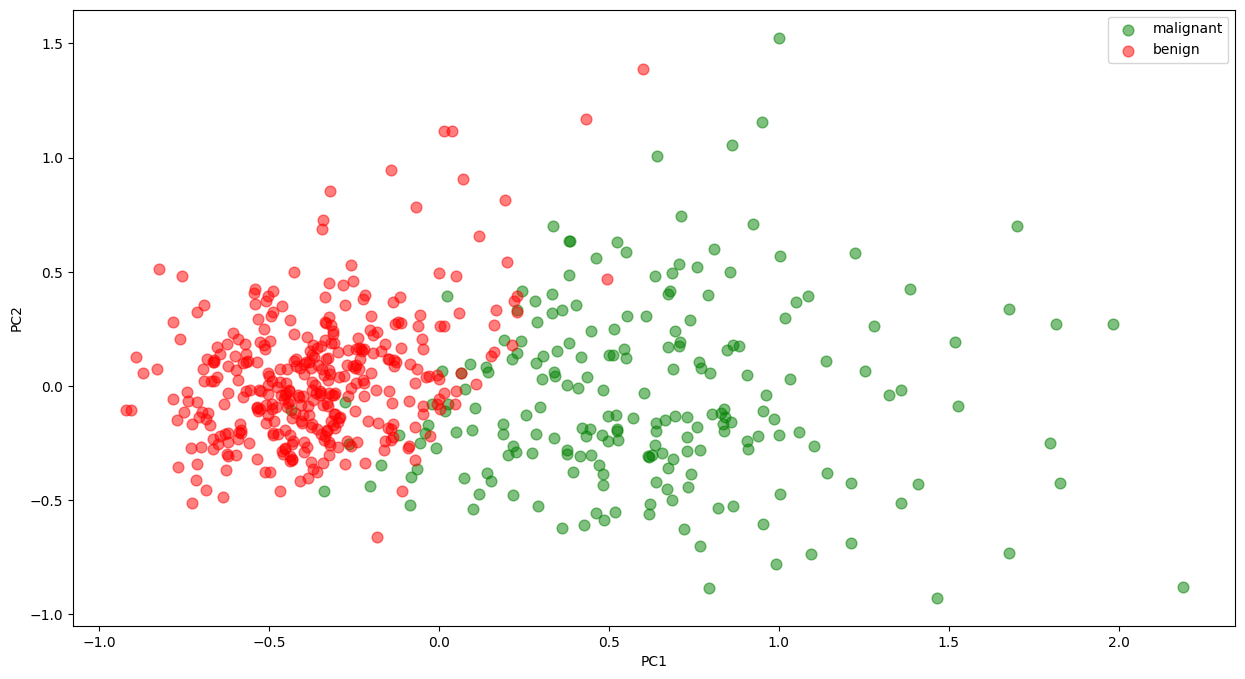

In [34]:
# Visualise the data in 2D
from sklearn.decomposition import PCA
%matplotlib inline
# Lets also use PCA to reduce the dimensionality and visualise the resulting labels

# I'll use MinMaxScaler() as I'd used in the experiments before
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca['target'] = y  # Assuming 'target' is the name of your target column

# Plot the data
fig, ax = plt.subplots(figsize=(15, 8))
targets = X_pca['target'].unique()
colors = ['g', 'r'] 
for target, color in zip(targets, colors):
    target_data = X_pca[X_pca['target'] == target]
    ax.scatter(target_data['PC1'], target_data['PC2'], c=color, label=target, s=60, alpha=0.5)
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend([target_names[0], target_names[1]])
plt.show()

In [35]:
# repeat in 3D
%matplotlib qt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
X_pca['target'] = y  # Assuming 'target' is the name of your target column

# Plot the data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

targets = X_pca['target'].unique()
colors = ['r', 'g', 'b']  # Assuming you have only three unique target classes
for target, color in zip(targets, colors):
    target_data = X_pca[X_pca['target'] == target]
    ax.scatter(target_data['PC1'], target_data['PC2'], target_data['PC3'], c=color, label=target, s=60)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend([target_names[0], target_names[1]])
plt.show()

In [36]:
%matplotlib inline

# Repeat but now visualising the bad predictions vs the good ones

In [37]:
# Get the predictions
# we have ytest, ypred and Xtest

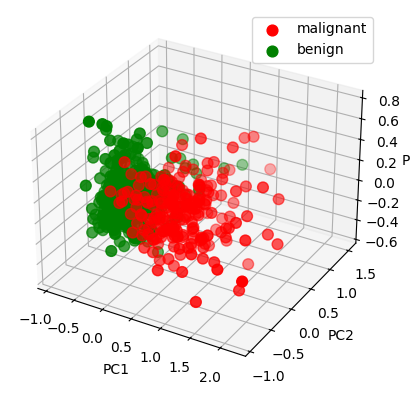

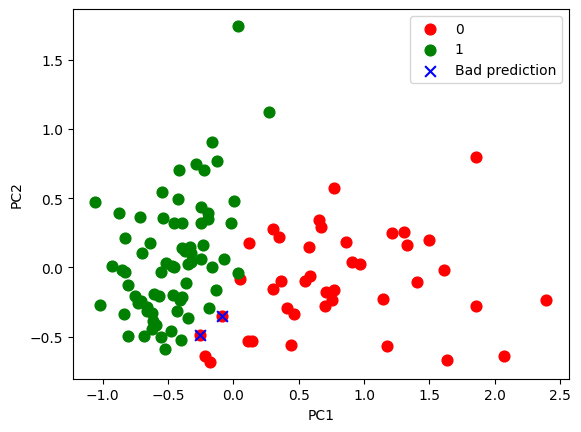

In [38]:
# Perform PCA with 2 components
ytest_copy = ytest.copy()
pca = PCA(n_components=2)

# @ Phoebe, always scale the data before performing pca analysis
# Xtest is not scaled yet, because I used a pipeline aggruping Scaler + Model
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(Xtest))

Xtest_pca = pca.fit_transform(X_scaled)
Xtest_pca = pd.DataFrame(Xtest_pca, columns=['PC1', 'PC2'])
Xtest_pca['target'] = ytest_copy.reset_index(drop=True)
Xtest_pca['prediction'] = ypred
Xtest_pca['good_prediction'] = np.where(Xtest_pca['target'] == Xtest_pca['prediction'], 1, 0)

# Plot the data
fig, ax = plt.subplots()
targets = Xtest_pca['target'].unique()
colors = ['r', 'g']
for target, color in zip(targets, colors):
    target_data = Xtest_pca[Xtest_pca['target'] == target]
    ax.scatter(target_data['PC1'], target_data['PC2'], c=color, label=target, s=60)

# Plot the bad predictions
bad_predictions = Xtest_pca[Xtest_pca['good_prediction'] == 0]
ax.scatter(bad_predictions['PC1'], bad_predictions['PC2'], c='b', label='Bad prediction', marker='x', s=60)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.show()

In [39]:
# repeat in 3d
%matplotlib qt

# Perform PCA with 3 components
ytest_copy = ytest.copy()
pca = PCA(n_components=3)
Xtest_pca = pca.fit_transform(X_scaled)
Xtest_pca = pd.DataFrame(Xtest_pca, columns=['PC1', 'PC2', 'PC3'])
Xtest_pca['target'] = ytest_copy.reset_index(drop=True)  # Assuming 'target' is the name of your target column
Xtest_pca['prediction'] = ypred
Xtest_pca['good_prediction'] = np.where(Xtest_pca['target'] == Xtest_pca['prediction'], 1, 0)

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

targets = Xtest_pca['target'].unique()
colors = ['r', 'g']  # Assuming you have only two unique target classes
for target, color in zip(targets, colors):
    target_data = Xtest_pca[Xtest_pca['target'] == target]
    ax.scatter(target_data['PC1'], target_data['PC2'], target_data['PC3'], c=color, label=target, s=60)

# Plot the bad predictions
bad_predictions = Xtest_pca[Xtest_pca['good_prediction'] == 0]
ax.scatter(bad_predictions['PC1'], bad_predictions['PC2'], bad_predictions['PC3'], c='b', label='Bad prediction', marker='x', s=60)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()


In [41]:
# Look at the data of the bad predictions to see if there is a pattern
# we have ytest, ypred and Xtest

In [42]:
# from Xtest get the bad predictions using ytest and ypred
bad_predictions = Xtest[(ytest != ypred).values]
bad_predictions

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
498,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,0.1561,0.05915,...,17.58,28.06,113.8,967.0,0.1246,0.21010,0.2866,0.11200,0.2282,0.06954
399,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.1,931.4,0.1148,0.09866,0.1547,0.06575,0.3233,0.06165


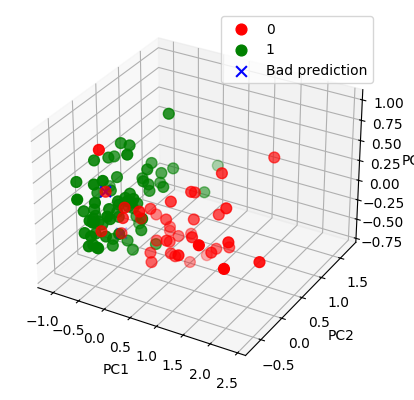

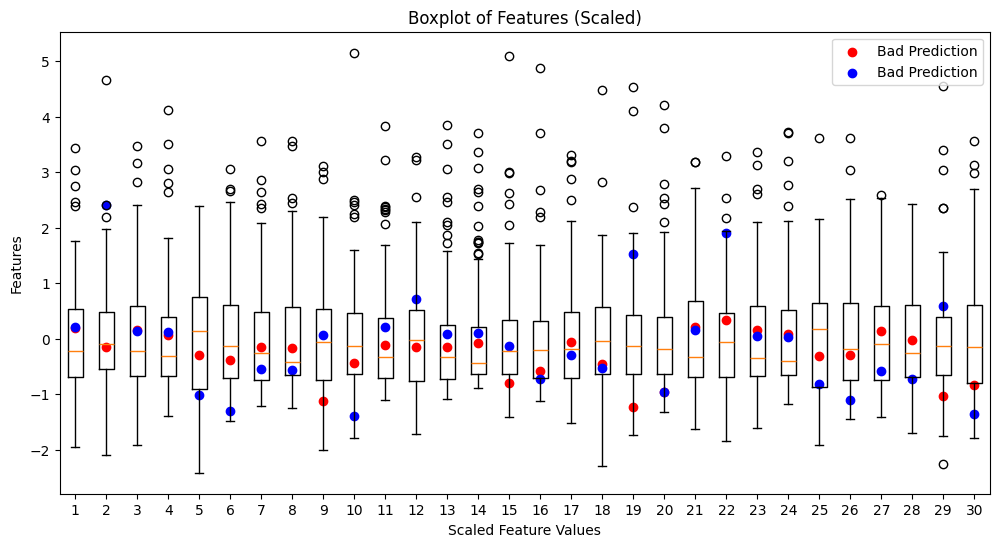

In [43]:
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Scale the feature values
scaler = StandardScaler()
Xtest_scaled = scaler.fit_transform(Xtest)

# Look at the data of the bad predictions to see if there is a pattern
bad_predictions = Xtest_scaled[(ytest != ypred).values]

# Plot boxplots of all features
plt.figure(figsize=(12, 6))
plt.boxplot(Xtest_scaled)
plt.title('Boxplot of Features (Scaled)')
plt.xlabel('Scaled Feature Values')
plt.ylabel('Features')

# Overlay the bad predictions
colors = ['r', 'b']
for i, prediction in enumerate(bad_predictions):
    label = "Bad Prediction {}".format(i)
    plt.scatter(np.arange(1, prediction.shape[0]+1), prediction, color=colors[i], label='Bad Prediction')

plt.legend()
plt.show()
